# 说明


KNN是一种非常经典的非参数学习算法，相比于基于最小二乘的线性回归算法，KNN也可以看做一种基于X邻域的条件估计

In [1]:
import functools as func
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets as ds
import pygraphviz as pgv
from IPython import display as dsp
import subprocess as sbp

%matplotlib inline

In [68]:
@func.total_ordering
class BinaryTreeNode:
    def __init__(self, value, left=None, right=None):
        self.left = left
        self.right = right
        self.value = value
        
    def __lt__(self, node):
        return self.value < node.value
    
    def __eq__(self, node):
        return self.value == node.value
    
    def __str__(self):
        return str(self.value)
    
    def has_right_child(self):
        return self.right is not None
    
    def has_left_child(self):
        return self.left is not None
    
    def has_child(self):
        return self.has_right_child() or self.has_left_child()

In [54]:
BinaryTreeNode(2) is None

False

In [4]:
class BinaryTree:
    def __init__(self):
        self.root = None
    
    def add(self, value):
        node = BinaryTreeNode(value)
        if not self.is_empty():
            self._add(self.root, node)
        else:
            self.root = node

    
    def _add(self, parent, node_new):
        if node_new < parent:
            print('Insert into left leaf')
            if parent.has_left_child():
                self._add(parent.left, node_new)
            else:
                parent.left = node_new
        else:
            print('Insert into right leaf')
            if parent.has_right_child():
                self._add(parent.right, node_new)
            else:
                parent.right = node_new
        
    
    def clear(self):
        if not self.is_empty():
            self.root = None
            
    def is_empty(self):
        return self.root is None
    
    def find(self, value):
        if self.is_empty():
            return False
        
        return self._find(self.root, value)
        
    
    def _find(self, node, value):
        if node.value == value:
            return True
        elif value < node.value:
            return not has_left_child() or self._find(node.left, value)

        else:
            return not has_right_child() or self._find(node.right, value)

    
    def print_tree(self):
        if self.root:
            self._print_tree(self.root)
    
    def _print_tree(self, node):
        if node is not None:
            self._print_tree(node.left)
            print(str(node.value) + ' ')
            self._print_tree(node.right)

In [70]:
tree = BinaryTree()
tree.add(3)
tree.add(4)
tree.add(0)
tree.add(8)
tree.add(2)

Insert into right leaf
Insert into left leaf
Insert into right leaf
Insert into right leaf
Insert into left leaf
Insert into right leaf


Key: node: 0-0, parent: 0-1
Depth: node: 0, parent: 0
Aies: node: 0, parent: 0
Insert R: [0, 1]: 1 to R: [1, 2]: 1 left
Key: node: 0-2, parent: 0-1
Depth: node: 0, parent: 0
Aies: node: 0, parent: 0
Insert R: [2, 3]: 2 to R: [1, 2]: 1 right
Key: node: 0-3, parent: 0-1
Depth: node: 0, parent: 0
Aies: node: 0, parent: 0
Insert R: [3, 2]: 1 to R: [1, 2]: 1 right
Key: node: 1-2, parent: 1-3
Depth: node: 1, parent: 1
Aies: node: 1, parent: 1
Insert R: [3, 2]: 1 to R: [2, 3]: 2 left
Key: node: 0-4, parent: 0-1
Depth: node: 0, parent: 0
Aies: node: 0, parent: 0
Insert R: [4, 2]: 4 to R: [1, 2]: 1 right
Key: node: 1-2, parent: 1-3
Depth: node: 1, parent: 1
Aies: node: 1, parent: 1
Insert R: [4, 2]: 4 to R: [2, 3]: 2 left
Key: node: 0-4, parent: 0-3
Depth: node: 2, parent: 2
Aies: node: 0, parent: 0
Insert L: [4, 2]: 4 to L: [3, 2]: 1 right


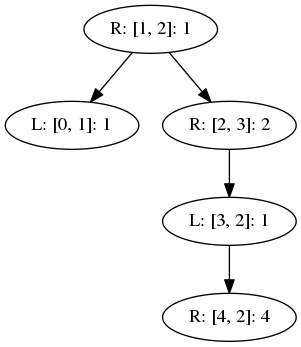

In [54]:
import logging

@func.total_ordering
class KDTreeNode(object):
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self._axis = 0
        self._depth = 0
        self.dim = len(key)
        
        self.parent = None
        self.is_left = None
        
    def __eq__(self, node):
        return self.value == node.value
    
    def __lt__(self, node):
        return self.value < node.value
    
    def __str__(self):
       
        return ('L: ' if self.is_left else 'R: ') + str(self.key) + ': ' + str(self.value)
    
    def has_left_child(self):
        return self.left is not None
    
    def has_right_child(self):
        return self.right is not None
    
    def has_child(self):
        return self.has_left_child() or self.has_right_child()
    
    @property
    def axis(self):
        return self._axis
    
    @axis.setter
    def axis(self, val):
        self._axis = val
    
    @property
    def depth(self):
        return self._depth
    
    @depth.setter
    def depth(self, depth):
        self._depth = depth
        self._axis = depth % self.dim
        
    @property
    def key_split(self):
        
        return self.key[self._axis]
   


class KDTree(object):
    def __init__(self, kv_list=None):
        self.kv_list = kv_list
        self.root = None
    
    def fit(self, kv_list):
        self.kv_list = kv_list
        self.kdtree()
        return self
        
    def kdtree(self):
        for k, v  in kv_list:
            self.add(k, v)
               
    
    def add(self, k, v):
        node = KDTreeNode(k, v)
        node.depth = 0
        if self.is_empty():
            self.root = node
        else:
            self._add(self.root, node)
    
    def _add(self, parent, node_new):
        node_new.parent = parent
        print('Key: node: {a1}-{node}, parent: {a2}-{p}'.format(node=node_new.key_split, p=parent.key_split, a1=node_new.axis, a2=node_new.axis))
        print('Depth: node: {d1}, parent: {d2}'.format(d1=node_new.depth, d2=parent.depth))
        print('Aies: node: {a1}, parent: {a2}'.format(a1=node_new.depth % node_new.dim, a2=parent.depth % parent.dim))
        axis = parent.axis
        if  node_new.key[axis] < parent.key[axis]:
            print('Insert {node} to {p} left'.format(node=node_new, p=parent))
            node_new.depth = parent.depth + 1
            node_new.is_left = True
            if parent.has_left_child():
                self._add(parent.left, node_new)
            else:
                parent.left = node_new
        else:
            print('Insert {node} to {p} right'.format(node=node_new, p=parent))
            node_new.depth = parent.depth + 1
            node_new.is_left = False
            if parent.has_right_child():
                self._add(parent.right, node_new)
            else:
                parent.right = node_new
        
        
    
    def is_empty(self):
        return self.root is None
    
    def clear(self):
        self.root = None
   
    
    def find_nearst_neighbors(self, key):
        pass
    
    def _find_nearst_neighbors(self, key):
        pass
    
    def print_tree(self):
        if not self.is_empty():
            self._print_tree(self.root)
    
    def _print_tree(self, node):
        if node is not None:
            self._print_tree(node.left)
            print(node)
            self.print_tree(node.right)
            
    def draw_tree(self):
        if not self.is_empty():
            graph = pgv.AGraph(directed=True, strict=False)
            graph.layout()
            self._draw_tree(self.root, graph)
            graph.draw('kdtree.png')
            graph.write('kdtree.dot')
            sbp.call('dot -Tpng -o kdtree.png  kdtree.dot', shell=True)
            return dsp.Image(filename='kdtree.png')
            

    
    def _draw_tree(self, node, graph):
        if node is not None:
            self._draw_tree(node.left, graph)
            graph.add_node(str(node))
            if node.has_left_child():
                graph.add_edge(str(node), str(node.left), skew=-0.4)
            if node.has_right_child():
                graph.add_edge(str(node), str(node.right), skew=0.4)
            self._draw_tree(node.right, graph)
        

kv_list = [([1, 2], 1), ([0, 1], 1), ([2, 3], 2), ([3, 2, ], 1), ([4, 2], 4)]
kdtree = KDTree().fit(kv_list)
kdtree.draw_tree()


In [21]:
n = KDTreeNode([1,2], 2)

In [32]:
class SomeClass(object):
    def __init__(self, n):
        self.list = range(0, n)

    @property
    def list(self):
        return self._list
    @list.setter
    def list(self, list):
        print('hello')
        self._list = list
        self._listsquare = [x**2 for x in self._list ]

    @property
    def listsquare(self):
        return self._listsquare
    @listsquare.setter
    def listsquare(self, val):
        self.list = [int(pow(x, 0.5)) for x in val]

In [33]:
c = SomeClass(5)


hello


In [40]:
import logging

@func.total_ordering
class KDTreeNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.axis = 0
        self._depth = 0
        self.dim = len(key)
        
        self.parent = None
        self.is_left = None
        
    def __eq__(self, node):
        return self.value == node.value
    
    def __lt__(self, node):
        return self.value < node.value
    
    def __str__(self):
        return 'L: ' if self.is_left else 'R: ' + str(self.key) + ': ' + str(self.value)
    
    def has_left_child(self):
        return self.left is not None
    
    def has_right_child(self):
        return self.right is not None
    
    def has_child(self):
        return self.has_left_child() or self.has_right_child()

    @property
    def axis(self):
        return self.axis
    
    @axis.setter
    def axis(self, val):
        self.axis = val
    
    @property
    def depth(self):
        return self._depth
    
    @depth.setter
    def depth(self, depth):
        logging.debug('>>>>')
        self._depth = depth
        self.axis = depth % self.dim
        
    @property
    def key_split(self):
        return self.key[self.axis]
   




Key: node: 0-2, parent: 0-1
Depth: node: 0, parent: 0
Aies: node: 0, parent: 0
Insert R: [2, 3]: 2 to R: [1, 2]: 1 right
Key: node: 0-3, parent: 0-1
Depth: node: 0, parent: 0
Aies: node: 0, parent: 0
Insert R: [3, 2]: 1 to R: [1, 2]: 1 right
Key: node: 0-3, parent: 0-2
Depth: node: 1, parent: 1
Aies: node: 1, parent: 1
Insert R: [3, 2]: 1 to R: [2, 3]: 2 right
Key: node: 0-4, parent: 0-1
Depth: node: 0, parent: 0
Aies: node: 0, parent: 0
Insert R: [4, 2]: 4 to R: [1, 2]: 1 right
Key: node: 0-4, parent: 0-2
Depth: node: 1, parent: 1
Aies: node: 1, parent: 1
Insert R: [4, 2]: 4 to R: [2, 3]: 2 right
Key: node: 0-4, parent: 0-3
Depth: node: 2, parent: 2
Aies: node: 0, parent: 0
Insert R: [4, 2]: 4 to R: [3, 2]: 1 right


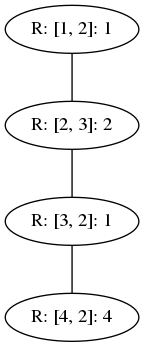

In [41]:
class KDTree:
    def __init__(self, kv_list=None):
        self.kv_list = kv_list
        self.root = None
    
    def fit(self, kv_list):
        self.kv_list = kv_list
        self.kdtree()
        return self
        
    def kdtree(self):
        for k, v  in kv_list:
            self.add(k, v)
               
    
    def add(self, k, v):
        node = KDTreeNode(k, v)
        node.depth = 0
        if self.is_empty():
            self.root = node
        else:
            self._add(self.root, node)
    
    def _add(self, parent, node_new):
        node_new.parent = parent
        print('Key: node: {a1}-{node}, parent: {a2}-{p}'.format(node=node_new.key_split, p=parent.key_split, a1=node_new.axis, a2=node_new.axis))
        print('Depth: node: {d1}, parent: {d2}'.format(d1=node_new.depth, d2=parent.depth))
        print('Aies: node: {a1}, parent: {a2}'.format(a1=node_new.depth % node_new.dim, a2=parent.depth % parent.dim))
        axis = parent.axis
        if  node_new.key[axis] < parent.key[axis]:
            print('Insert {node} to {p} left'.format(node=node_new, p=parent))
            node_new.depth = parent.depth + 1
            node_new.is_left = True
            if parent.has_left_child():
                self._add(parent.left, node_new)
            else:
                parent.left = node_new
        else:
            print('Insert {node} to {p} right'.format(node=node_new, p=parent))
            node_new.depth = parent.depth + 1
            node_new.is_left = False
            if parent.has_right_child():
                self._add(parent.right, node_new)
            else:
                parent.right = node_new
        
        
    
    def is_empty(self):
        return self.root is None
    
    def clear(self):
        self.root = None
   
    
    def find_nearst_neighbors(self, key):
        pass
    
    def _find_nearst_neighbors(self, key):
        pass
    
    def print_tree(self):
        if not self.is_empty():
            self._print_tree(self.root)
    
    def _print_tree(self, node):
        if node is not None:
            self._print_tree(node.left)
            print(node)
            self.print_tree(node.right)
            
    def draw_tree(self):
        if not self.is_empty():
            graph = pgv.AGraph()
            graph.layout()
            self._draw_tree(self.root, graph)
            graph.draw('kdtree.png')
            graph.write('kdtree.dot')
            sbp.call('dot -Tpng -o kdtree.png  kdtree.dot', shell=True)
            return dsp.Image(filename='kdtree.png')
            

    
    def _draw_tree(self, node, graph):
        if node is not None:
            self._draw_tree(node.left, graph)
            graph.add_node(str(node))
            if node.has_left_child():
                graph.add_edge(str(node), str(node.left))
            if node.has_right_child():
                graph.add_edge(str(node), str(node.right))
            self._draw_tree(node.right, graph)
        

kv_list = [([1, 2], 1), ([2, 3], 2), ([3, 2, ], 1), ([4, 2], 4)]
kdtree = KDTree().fit(kv_list)
kdtree.draw_tree()